# Contents

- Contents
- Description
- Data Generation
- Train + Examine

# Description

In this notebook we explore neural networks performance.

In detail we will be examining different **Architecture** and **Data Relationship**.

In this notebook we will looking at linear relationship.

# Data Generation

In [1]:
RANDOM_STATE = 2023

In [50]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.datasets import make_regression

In [39]:
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=RANDOM_STATE)

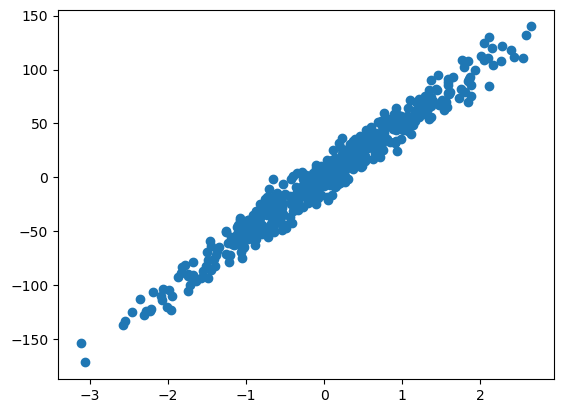

In [40]:
plt.scatter(X, y)
plt.show()

In [41]:
y_pow_2 = y ** 2

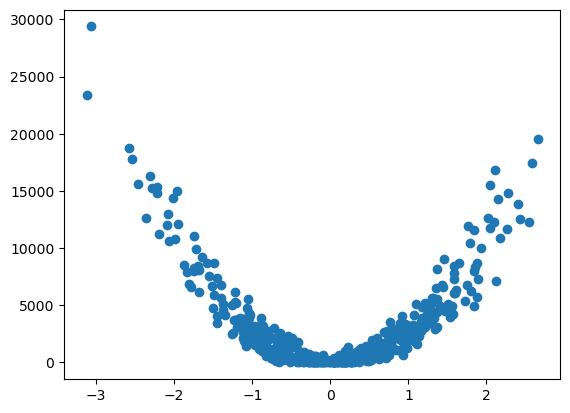

In [42]:
plt.scatter(X, y_pow_2)
plt.show()

In [43]:
X_sin = np.sin(X).flatten() * 150

In [44]:
y_sin = y + X_sin

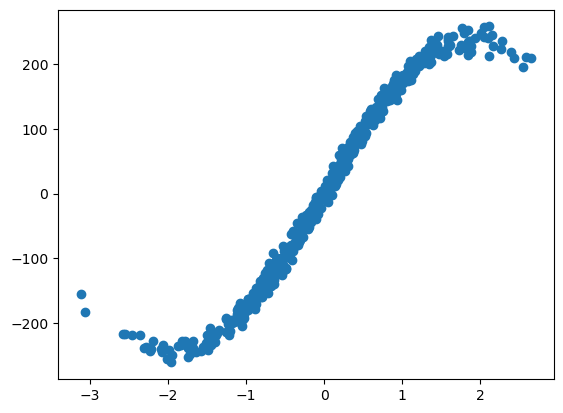

In [47]:
plt.scatter(X, y_sin)
plt.show()

# Train + Examine

We want to examine
- Different activation functions
  - Sigmoid
  - Tanh
  - ReLU
  - SiLU
- Different number of neurons
  - 2, 4, 8, 16, 32
- Different number of hidden layers
  - 1, 2, 3, 4, 8

In [85]:
def train_evaluate(net, X_train, y_train, X_valid, y_valid, patience):
    X_train = torch.FloatTensor(X_train.copy())
    y_train = torch.FloatTensor(y_train.copy())
    X_valid = torch.FloatTensor(X_valid.copy())
    y_valid = torch.FloatTensor(y_valid.copy())
    
    train_error = []
    valid_error = []
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    optimizer.zero_grad()
    loss = nn.MSELoss()
    
    # early stopping
    best_mse = float('inf')
    counter = patience
    
    while True:
        net.train()
        z_train = net.forward(X_train).flatten()
        mse_train = loss(z_train, y_train)
        train_error.append(mse_train.item())
        
        # learning
        mse_train.backward()
        optimizer.step()
        
        with torch.no_grad():
            net.eval()
            z_valid = net.forward(X_valid).flatten()
            mse_valid = loss(z_valid, y_valid)
            valid_error.append(mse_valid.item())
        
        # early stopping
        if mse_valid < best_mse:
            best_mse = mse_valid
            counter = patience
        else:
            counter -= 1
        if counter == 0:
            break
        
                
    # visualize
    x = np.arange(len(train_error))
    plt.figure(figsize=(4,2))
    plt.plot(x, train_error, color='green')
    plt.plot(x, valid_error, color='red')
    plt.show()
    
    plt.figure(figsize=(4,2))
    plt.scatter(X_train, y_train, color='green')
    plt.scatter(X_valid, z_valid, color='orange')
    plt.show()
    
    best_mse = min(valid_error)
    best_rmse = best_mse ** 0.5
    print('Best validation MSE: {:.2f}'.format(best_mse))
    print('Best validation RMSE: {:.2f}'.format(best_rmse))
    
    return net, best_rmse

In [86]:
demo_nn = nn.Sequential(*[nn.Linear(1, 1)])

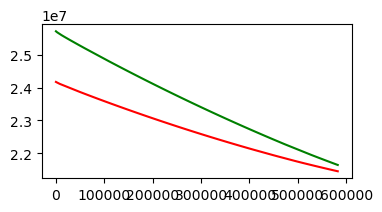

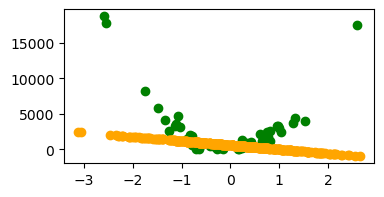

Best validation MSE: 21451760.00
Best validation RMSE: 4631.60


In [87]:
_, _ = train_evaluate(demo_nn, X[:50], y_pow_2[:50], X[50:], y_pow_2[50:], 2)

In [88]:
demo_nn = nn.Sequential(*[nn.Linear(1, 5), nn.Sigmoid(), nn.Linear(5, 1)])

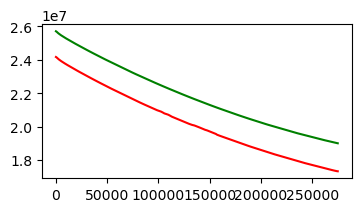

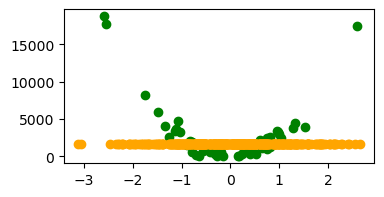

Best validation MSE: 17317712.00
Best validation RMSE: 4161.46


In [89]:
_, _ = train_evaluate(demo_nn, X[:50], y_pow_2[:50], X[50:], y_pow_2[50:], 2)

In [90]:
demo_nn = nn.Sequential(*[nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 1)])

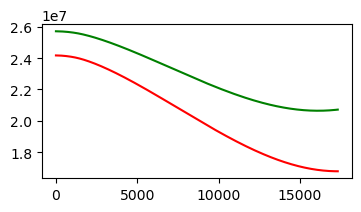

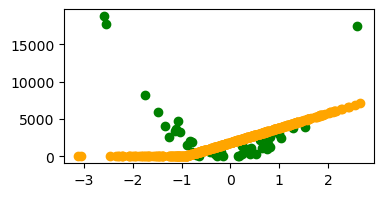

Best validation MSE: 16781554.00
Best validation RMSE: 4096.53


In [91]:
_, _ = train_evaluate(demo_nn, X[:50], y_pow_2[:50], X[50:], y_pow_2[50:], 2)

In [92]:
demo_nn = nn.Sequential(*[nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 5), nn.ReLU(), nn.Linear(5, 1)])

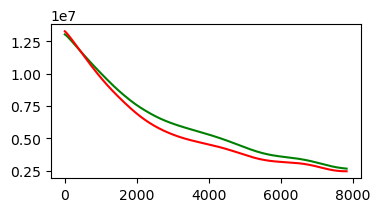

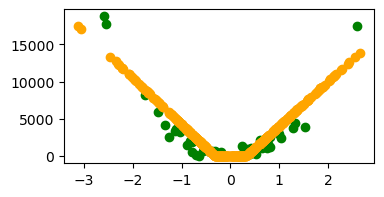

Best validation MSE: 2473942.50
Best validation RMSE: 1572.88


In [94]:
_, _ = train_evaluate(demo_nn, X[:50], y_pow_2[:50], X[50:], y_pow_2[50:], 2)

In [114]:
demo_nn = nn.Sequential(*[nn.Linear(1, 16), nn.SiLU(), nn.Linear(16, 16), nn.SiLU(), nn.Linear(16, 16), nn.SiLU(), nn.Linear(16, 1)])

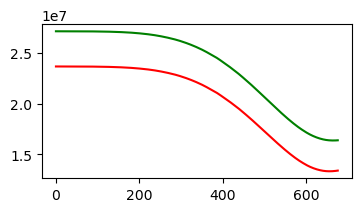

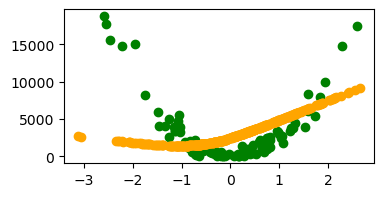

Best validation MSE: 13352460.00
Best validation RMSE: 3654.10


In [115]:
_, _ = train_evaluate(demo_nn, X[:100], y_pow_2[:100], X[100:], y_pow_2[100:], 20)